In [1]:
!git clone https://github.com/BM2304/ML_Tutorials

fatal: destination path 'ML_Tutorials' already exists and is not an empty directory.


In [2]:
!ls ML_Tutorials/Self_Driving_Udemy/self_driving_simulator_data/

driving_log.csv  IMG


In [4]:
# Import Libs
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [5]:
# Read CSV

#datadir = 'ML_Tutorials/Self_Driving_Udemy/self_driving_simulator_data'
datadir = 'self_driving_simulator_data' # Use offline
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1) # don't shorten
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\center_2019_03_14_18_40_52_629.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\left_2019_03_14_18_40_52_629.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\right_2019_03_14_18_40_52_629.jpg,0.0,0.0,0,6.938794e-06
1,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\center_2019_03_14_18_40_52_700.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\left_2019_03_14_18_40_52_700.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\right_2019_03_14_18_40_52_700.jpg,0.0,0.0,0,9.066085e-06
2,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\center_2019_03_14_18_40_52_780.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\left_2019_03_14_18_40_52_780.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\right_2019_03_14_18_40_52_780.jpg,0.0,0.0,0,1.195853e-05
3,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\center_2019_03_14_18_40_52_851.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\left_2019_03_14_18_40_52_851.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\right_2019_03_14_18_40_52_851.jpg,0.0,0.0,0,1.056165e-05
4,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\center_2019_03_14_18_40_52_928.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\left_2019_03_14_18_40_52_928.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\right_2019_03_14_18_40_52_928.jpg,0.0,0.0,0,9.042565e-07


In [6]:
# Reformat Img file name (del head)

def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_03_14_18_40_52_629.jpg,left_2019_03_14_18_40_52_629.jpg,right_2019_03_14_18_40_52_629.jpg,0.0,0.0,0,6.938794e-06
1,center_2019_03_14_18_40_52_700.jpg,left_2019_03_14_18_40_52_700.jpg,right_2019_03_14_18_40_52_700.jpg,0.0,0.0,0,9.066085e-06
2,center_2019_03_14_18_40_52_780.jpg,left_2019_03_14_18_40_52_780.jpg,right_2019_03_14_18_40_52_780.jpg,0.0,0.0,0,1.195853e-05
3,center_2019_03_14_18_40_52_851.jpg,left_2019_03_14_18_40_52_851.jpg,right_2019_03_14_18_40_52_851.jpg,0.0,0.0,0,1.056165e-05
4,center_2019_03_14_18_40_52_928.jpg,left_2019_03_14_18_40_52_928.jpg,right_2019_03_14_18_40_52_928.jpg,0.0,0.0,0,9.042565e-07


[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


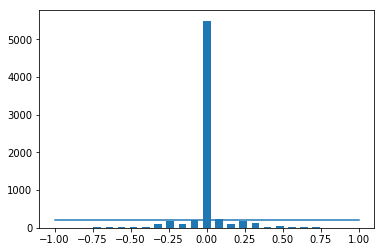

In [7]:
# Print histogram of steering

num_bins = 25
samples_per_bin = 200 # Add a threshhold of samples
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5 # center the values by 0
print(bins)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total_data: 6979
removed: 5324
remaining: 1655


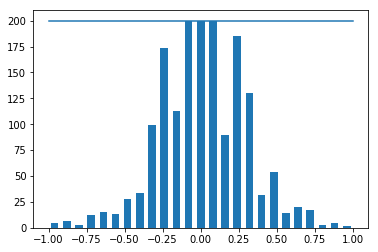

In [8]:
# Make Data uniform

print('total_data:', len(data))

remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
  
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))



In [9]:
# Import Images and Steering Data

# print(data.iloc[1]) # debug

def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steering

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [10]:
# Split Data in Training and Test Set

X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=1)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 1324
Valid Samples: 331


Text(0.5, 1.0, 'Validation set')

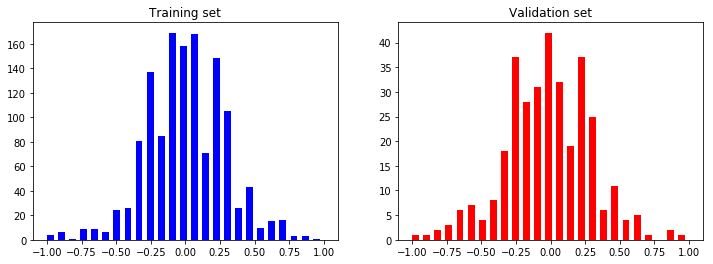

In [11]:
# Plotting Histogram of Training and Validation Data

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

__Data Augumentation__

In [15]:
# Zoom
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3)) # zooming up to 30% in the image (1.3)
    image = zoom.augment_image(image)
    return image

Text(0.5, 1.0, 'Zoomed Image')

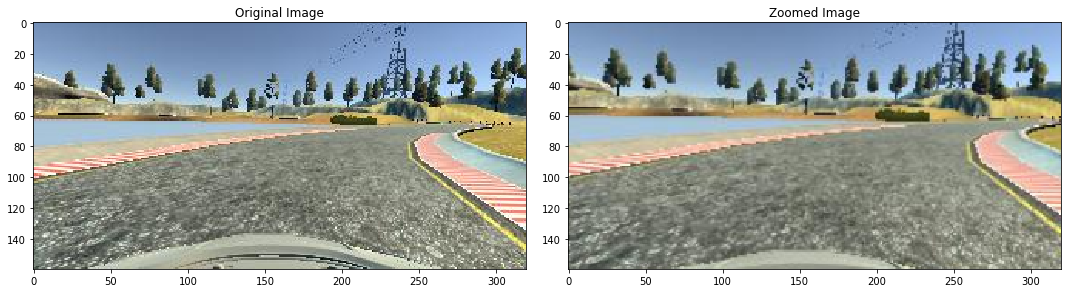

In [16]:
# Visualize Zooming

image = image_paths[random.randint(0, 1000)]
original_image = npimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [20]:
# Pan

def pan(image):
    pan = iaa.Affine(translate_percent= {'x': (-0.1, 0.1), 'y': (-0.1, 0.1)}) # turn -10% to +10%
    image = pan.augment_image(image)
    return image

Text(0.5, 1.0, 'Panned Image')

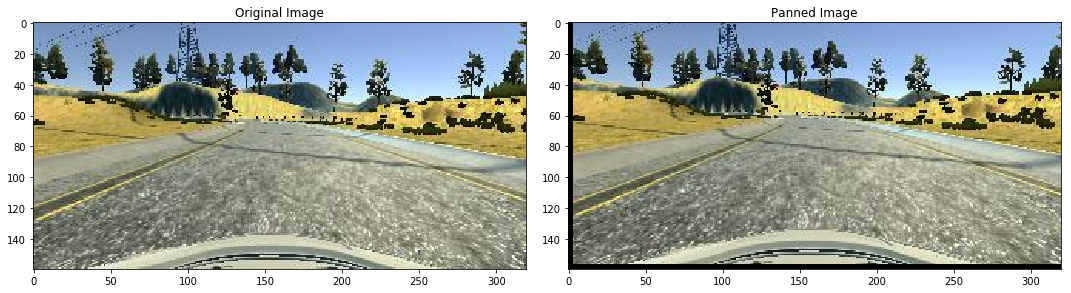

In [22]:
# Visualize Panning

image = image_paths[random.randint(0, 1000)]
original_image = npimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [23]:
# Random brightness/pixel intensity

def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'Brightness Altered Image')

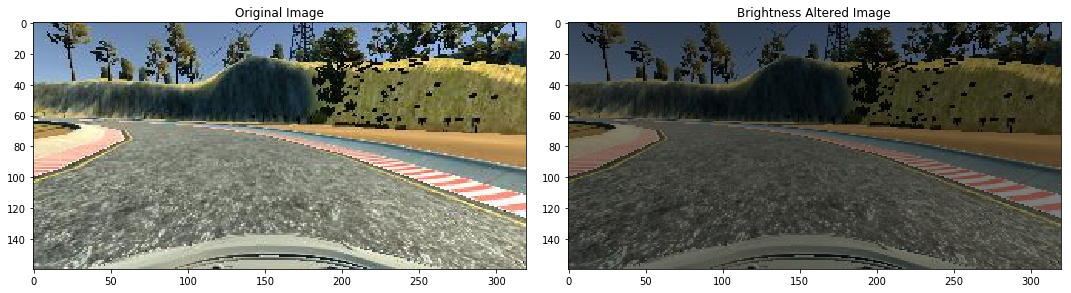

In [27]:
# Visualize pixel intensity

image = image_paths[random.randint(0, 1000)]
original_image = npimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness Altered Image')

In [59]:
# Flipping

def img_random_flip(image, steering_angle):
    image = cv2.flip(image, 1) # 0 vertical flip, 1 horizontal
    steering_angle = -steering_angle # inverting steering angle
    return image, steering_angle

Text(0.5, 1.0, 'Flipped Image - Steering Angle: -0.0')

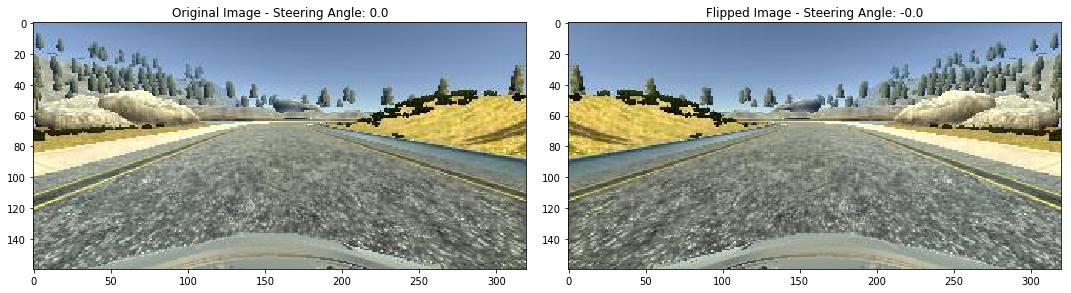

In [60]:
# Visualize flipping

random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = npimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title(f'Original Image - Steering Angle: {str(steering_angle)}')
axs[1].imshow(flipped_image)
axs[1].set_title(f'Flipped Image - Steering Angle: {str(flipped_steering_angle)}')

In [62]:
# Adding random augmentation to image

def random_augment(image, steering_angle):
    image = npimg.imread(image)
    if np.random.rand() < 0.5: # 50% of images
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)
    return image, steering_angle

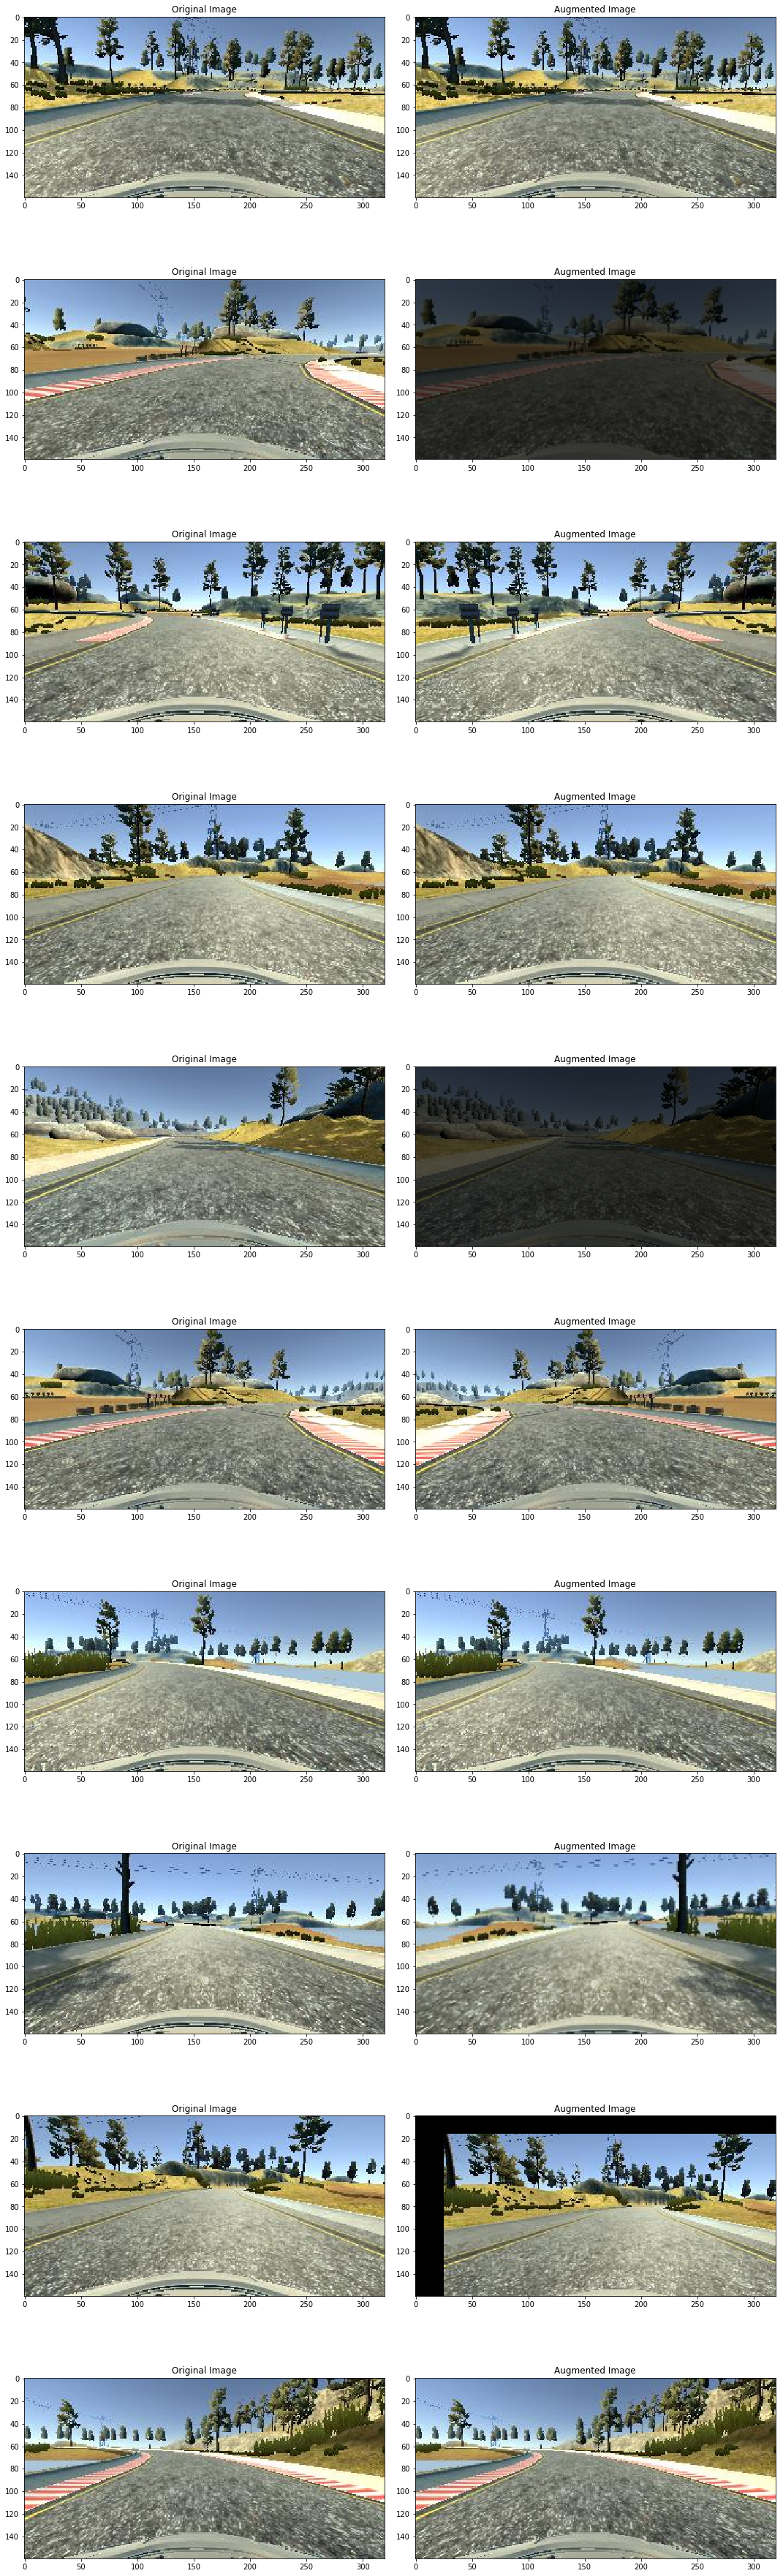

In [63]:
# Plot random augmentation

ncol = 2
nrow = 10
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
    randnum = random.randint(0, len(image_paths)-1)
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]
    
    original_image = npimg.imread(random_image)
    augmented_image, steering = random_augment(random_image, random_steering)
    
    axs[i][0].imshow(original_image)
    axs[i][0].set_title('Original Image')
    
    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title('Augmented Image')

__Preprocessing__

In [ ]:
# Preprocessing Images

def img_preprocess(img):
  img = npimg.imread(img)
  img = img[60:135, :, :] # crop height
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) # convert to YUV image
  img = cv2.GaussianBlur(img, (3,3), 0) # less details
  img = cv2.resize(img, (200, 66)) # nvidia modell architecture input
  img = img/255 # normalization
  return img

In [ ]:
# Visualize Preprocessing

image = image_paths[100]
original_image = npimg.imread(image)
preprocessed_image = img_preprocess(image)

fig, axs = plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [ ]:
# Preprocess all images

X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

(1324, 66, 200, 3)


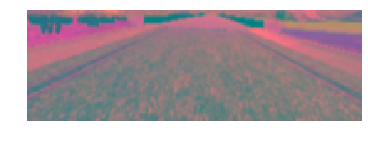

In [12]:
# Test

plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [42]:
# Defining Nvidia Model (Behavioral Cloning)

def nvidia_model():
    leakyrelu = LeakyReLU(alpha=0.3)
    
    model = Sequential()
    model.add(Conv2D(24, (5, 5), strides=(2,2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Conv2D(36, (5, 5), strides=(2,2), activation='elu'))
    model.add(Conv2D(48, (5, 5), strides=(2,2), activation='elu'))
    model.add(Conv2D(64, (3, 3), activation='elu'))
    model.add(Conv2D(64, (3, 3), activation='elu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.8))
    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    
    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model
    

In [43]:
# Print Model Summary

model = nvidia_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_19 (Dropout)         (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1152)              0         
__________

In [48]:
# Training

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=True)

Train on 1324 samples, validate on 331 samples
Epoch 1/35
1324/1324 [==============================] - 1s 613us/step - loss: 0.0319 - val_loss: 0.0411
Epoch 2/35
1324/1324 [==============================] - 1s 610us/step - loss: 0.0317 - val_loss: 0.0416
Epoch 3/35
1324/1324 [==============================] - 1s 600us/step - loss: 0.0322 - val_loss: 0.0410
Epoch 4/35
1324/1324 [==============================] - 1s 612us/step - loss: 0.0316 - val_loss: 0.0433
Epoch 5/35
1324/1324 [==============================] - 1s 622us/step - loss: 0.0346 - val_loss: 0.0426
Epoch 6/35
1324/1324 [==============================] - 1s 609us/step - loss: 0.0301 - val_loss: 0.0405
Epoch 7/35
1324/1324 [==============================] - 1s 618us/step - loss: 0.0324 - val_loss: 0.0429
Epoch 8/35
1324/1324 [==============================] - 1s 616us/step - loss: 0.0319 - val_loss: 0.0412
Epoch 9/35
1324/1324 [==============================] - 1s 609us/step - loss: 0.0305 - val_loss: 0.0431
Epoch 10/35
1324/

Text(0.5, 0, 'Epoch')

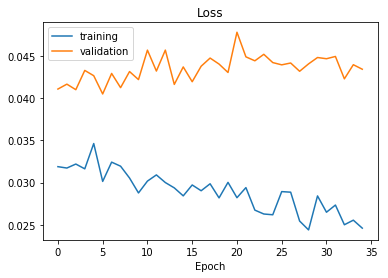

In [49]:
# Plot Training

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [51]:
# Saving

model.save('model.h5')
#from google.colab import files
#files.download('model.h5')